<a href="https://colab.research.google.com/github/San-desh17/Simple-Linear-Regression/blob/slr/Closed_form_solution(ols).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Mentorship Program/Simple Linear Regression/placement(1).csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
X = df['cgpa']
y = df['package']

In [5]:
print(X.shape)
print(y.shape)

(200,)
(200,)


<Axes: xlabel='cgpa', ylabel='package'>

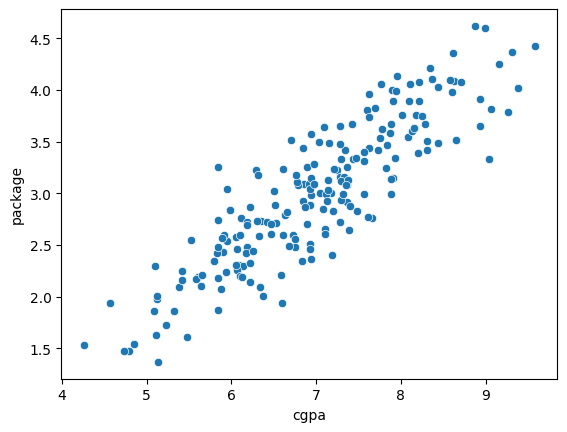

In [7]:
sns.scatterplot(x=X,y=y,data=df)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160,)
(40,)
(160,)
(40,)


In [27]:
# Own model

class LRM:
  def __init__(self):
    self.m = None
    self.b = None

  def fit(self,X_train,y_train):
    num = 0
    den = 0
    X_mean = np.mean(X_train)
    y_mean = np.mean(y_train)
    for i in range(X_train.shape[0]):
      num = num + ((X_train.iloc[i] - X_mean) * (y_train.iloc[i] - y_mean))
      den = den + ((X_train.iloc[i] - X_mean) * (X_train.iloc[i] - X_mean))
    self.m = num/den
    self.b = y_mean - (self.m * X_mean)

    return self.m,self.b

  def predict(self,X_test):
    print(X_test)
    return self.m * X_test + self.b

In [28]:
lr = LRM()

In [32]:
coef_, intercept_ = lr.fit(X_train,y_train)

In [33]:
print(lr.predict(X_test.iloc[0]))

8.58
3.891116009744203


In [34]:
print(coef_)
print(intercept_)

0.5579519734250721
-0.8961119222429152


Text(0.5, 1.0, 'Linear Regression')

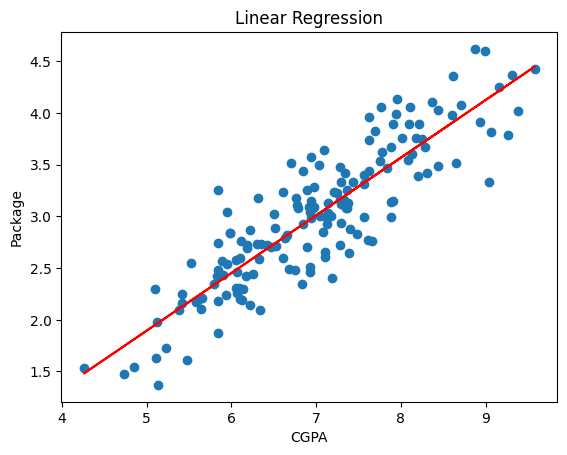

In [36]:
plt.scatter(X_train,y_train)
plt.plot(X_train,coef_ * X_train + intercept_,color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Linear Regression')